In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Functions

In [2]:
def softmax(z):
    max_z = np.max(z, axis=1,keepdims=True)  # Find maximum along each row
    z_shifted = z - max_z  # Subtract the maximum for numerical stability
    exp_z = np.exp(z_shifted)
    sum_exp_z = np.sum(exp_z, axis=1,keepdims=True )
    softmax = exp_z / sum_exp_z

    return softmax

In [3]:
def one_hot_encode(y,num_classes):
    y_train=np.zeros((y.shape[0],num_classes))
    for i in range(num_classes):
        for j in range(y.shape[0]):
            if y[j]==i:
                y_train[j,i]=1
                       
    return y_train

In [4]:
def log_cost(x,y,w,b):
    # x (m,n)
    # w (k,n)
    #b (1,k)
    #y (m,k) after one hot encoding
    epsilon=1e-8
    cost=0
    m,n=x.shape
    k=y.shape[1]
    z=x.dot(w.T)+b # m,k
    A=softmax(z)
    cost=-1/m*np.sum(np.log(A+epsilon)*y)
    
    return cost

In [5]:
def log_grad(x,y,w,b):
    z=x.dot(w.T)+b
    A=softmax(z)
    dj_dw=-(x.T.dot(y-A)).T
    dj_db=np.sum((y-A),axis=0)
    return dj_dw,dj_db

In [6]:
def grad_descent(x,y,w_in,b_in,cost_func,grad_func,alpha,iterations):
    w=w_in
    b=b_in
    j_hist=[]
    
    for i in range(iterations):
        dj_dw,dj_db=grad_func(x,y,w,b)
        
        w=w-alpha*dj_dw
        b=b-alpha*dj_db
        
        if i <100000:
            j_hist.append(cost_func(x,y,w,b))
            
        if i%np.ceil(iterations/20)==0:
            print(f"Iteration {i:4d}: cost:{j_hist[-1]:8.12f}")
    print(f'final_cost:{j_hist[-1]}')       
    return w,b,j_hist

# Load Data

In [7]:
df=pd.read_csv('Classification_train.csv')
z=np.array(df.head(25000))
y=z[:,0]
x=z[:,1:]
y_train=one_hot_encode(y,10)
x_train=x/255
cv=np.array(df.tail(5000))
x_cv=cv[:,1:]/255
y_cv=cv[:,0]

# Fit data

In [8]:
m,n=x_train.shape
m,k=y_train.shape
w_in=np.zeros((k,n))
b_in= np.zeros((1,k))
alpha=3e-5
iterations=2000
w_f,b_f,j_hist= grad_descent(x_train,y_train,w_in,b_in,log_cost,log_grad,alpha,iterations)
print(f'w_final,b_final found by grad descent {w_f,b_f}')

Iteration    0: cost:1.767620229515
Iteration  100: cost:0.221810827207
Iteration  200: cost:0.179314581608
Iteration  300: cost:0.160382943405
Iteration  400: cost:0.148946848679
Iteration  500: cost:0.141053520747
Iteration  600: cost:0.135188738752
Iteration  700: cost:0.130628051327
Iteration  800: cost:0.126974174991
Iteration  900: cost:0.123988142837
Iteration 1000: cost:0.121516307445
Iteration 1100: cost:0.119454800811
Iteration 1200: cost:0.117730650006
Iteration 1300: cost:0.116291049890
Iteration 1400: cost:0.115096933640
Iteration 1500: cost:0.114118939597
Iteration 1600: cost:0.113334778207
Iteration 1700: cost:0.112727451892
Iteration 1800: cost:0.112284014781
Iteration 1900: cost:0.111994685921
final_cost:0.11185291724162623
w_final,b_final found by grad descent (array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [

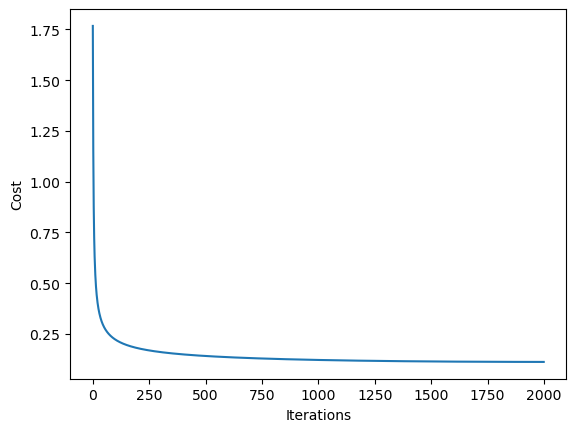

In [9]:
def iter_v_cost(iterations,j_hist):
    plt.plot(np.arange(iterations),j_hist)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.show()

iter_v_cost(iterations,j_hist)

In [10]:
def predict(x,w,b):
    z=x.dot(w.T)+b
    A=softmax(z)
    yp=np.argmax(A,axis=1)
    return yp

def acc(y,yp):
    return np.mean(y==yp)

yp=predict(x_train,w_f,b_f)
print(f'Accuracy_train:{acc(y,yp)}')
print(f'Missclassified:{np.ceil((1-acc(y,yp))*y.shape[0])}')

yp_cv=predict(x_cv,w_f,b_f)
print(f'Accuracy_cv:{acc(yp_cv,y_cv)}')


Accuracy_train:0.96968
Missclassified:759.0
Accuracy_cv:0.96


In [14]:
def cnf_mat(y,yp,num_class):
    cm=np.zeros((k,k))
    for i in range(y.shape[0]):
        if y[i]==yp[i]:
            cm[y[i],y[i]]+=1
        if y[i]!=yp[i]:
            cm[y[i],yp[i]]+=1
    return cm

cm=cnf_mat(y,yp,10)

cm_df=pd.DataFrame(cm)
print('Confusion Matrix:')
cm_df

Confusion Matrix:


,0,1,2,3,4,5,6,7,8,9
0,2420.0,56.0,0.0,10.0,2.0,0.0,3.0,4.0,8.0,1.0
1,23.0,2441.0,0.0,12.0,1.0,14.0,2.0,3.0,2.0,5.0
2,8.0,1.0,2405.0,5.0,0.0,1.0,0.0,1.0,1.0,0.0
3,20.0,1.0,3.0,2379.0,12.0,17.0,13.0,34.0,1.0,4.0
4,0.0,0.0,0.0,10.0,2561.0,21.0,1.0,5.0,4.0,6.0
5,1.0,3.0,4.0,17.0,17.0,2450.0,1.0,1.0,3.0,2.0
6,0.0,0.0,0.0,15.0,3.0,6.0,2449.0,107.0,0.0,8.0
7,9.0,0.0,0.0,50.0,13.0,9.0,80.0,2279.0,1.0,4.0
8,10.0,1.0,2.0,5.0,1.0,8.0,2.0,0.0,2437.0,2.0
9,2.0,0.0,0.0,2.0,23.0,2.0,16.0,8.0,5.0,2421.0


# F1_score

In [15]:
def f1score(cm):
    k=cm.shape[0]
    prec=np.zeros((k))
    rec=np.zeros((k))
    t0=np.sum(cm,axis=0)
    t1=np.sum(cm,axis=1)
    f1=np.zeros((k))
    for i in range(k):
        prec[i]=cm[i,i]/t0[i]
    for j in range(k):
        rec[j]=cm[j,j]/t1[j]
    
    for t in range(k):
        f1[t]=2*prec[t]*rec[t]/(prec[t]+rec[t])
        
    f1_score=np.mean(f1)
    
    return f1_score,prec,rec

In [16]:
f1_score,P,R=f1score(cm)
print(f'f1_score_train:{f1_score}')

f1_score_train:0.9697380320763462


# Load Test_data

In [17]:
td=pd.read_csv('Classification_test.csv')
td=np.array(td)
x_test=td[:,1:]/255
ID=td[:,0]

In [18]:
y_test_pred=predict(x_test,w_f,b_f)

In [19]:
result=np.c_[ID,y_test_pred]
result=pd.DataFrame(result,columns=['ID','Y_predicted'])
result

,ID,Y_predicted
0,15795,0
1,860,4
2,5390,5
3,11964,5
4,11284,6
...,...,...
9995,11260,9
9996,18563,9
9997,634,0
9998,10057,8


In [38]:
result.to_csv('Logistic_predcition.csv')